In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import mne


In [3]:
fname = 'Data/Resting and cognitive state EEG dataset/sub-01/ses-session1/eeg/sub-01_ses-session1_task-eyesclosed_eeg.vhdr'
raw = mne.io.read_raw_brainvision(fname, preload=True).filter(0.5 ,67)
raw_psd = raw.compute_psd()

Extracting parameters from Data/Resting and cognitive state EEG dataset/sub-01/ses-session1/eeg/sub-01_ses-session1_task-eyesclosed_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 67 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 67.00 Hz
- Upper transition bandwidth: 16.75 Hz (-6 dB cutoff frequency: 75.38 Hz)
- Filter length: 3301 samples (6.602 s)

Effective window size : 4.096 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3280\1493885183.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_psd.plot(picks=['FC3'])


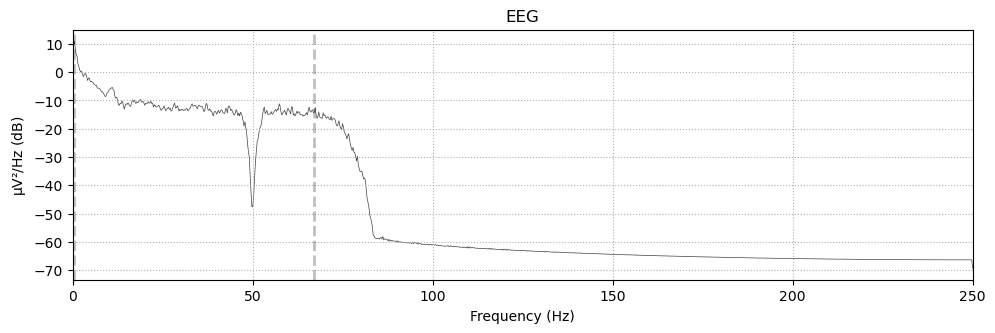

In [4]:
%matplotlib qt
raw_psd.plot(picks=['FC3'])

In [5]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, AF7, Fz, F1, F3, F5, F7, FC1, FC3, FC5, FT7, Cz, C1, ...
 chs: 61 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 67.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>

In [ ]:
# raw.plot()

In [ ]:
Plot, Axis = plt.subplots()
plt.ion()
plt.subplots_adjust(bottom=0.25)
sampling_freq = 500
view_length = 5
sample_length = view_length * sampling_freq
view_start = 0
sample_start = view_start * sampling_freq
view_chan = ['FC3', 'FC5']
# view_data = raw.get_data(picks=view_chan, tmin=view_start, tmax=view_start+view_length)
view_data = raw.get_data(picks=view_chan)
epoch = np.expand_dims(view_data, 1)
freqs = np.arange(1, 67.0, 2)
morlet_coef = mne.time_frequency.tfr_array_morlet(epoch, 256, freqs, freqs/2, output = 'power')
# X, Y = np.meshgrid(np.linspace(view_start, view_start+view_length, view_data.shape[1]), freqs)
X, Y = np.meshgrid(np.linspace(view_start, view_start+view_length, sample_length, False), freqs)
# X, Y = np.meshgrid(raw.times, freqs)
plt.pcolormesh(X, Y, morlet_coef[0, 0, :, sample_start:sample_length:1])

slider_color = 'White'
axis_position = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor = slider_color)
slider_position = Slider(axis_position,'Time', 0.0, raw.times[-1] - view_length)

def update(val):
    Axis.clear()
    pos = int(slider_position.val * sampling_freq)
    X, Y = np.meshgrid(np.linspace(slider_position.val, slider_position.val+view_length, sample_length, False), freqs)
    Axis.pcolormesh(X, Y, morlet_coef[0, 0, :, pos:pos+sample_length:1])
    Plot.show()
 
# update function called using on_changed() function
slider_position.on_changed(update)

plt.colorbar()
# plt.show()
Plot.show()

In [ ]:
Axis.pcolormesh(X, Y, morlet_coef[0, 0, :, sample_start:sample_length:1])
Plot.show()

In [ ]:
Axis.clear()
# Plot.show()